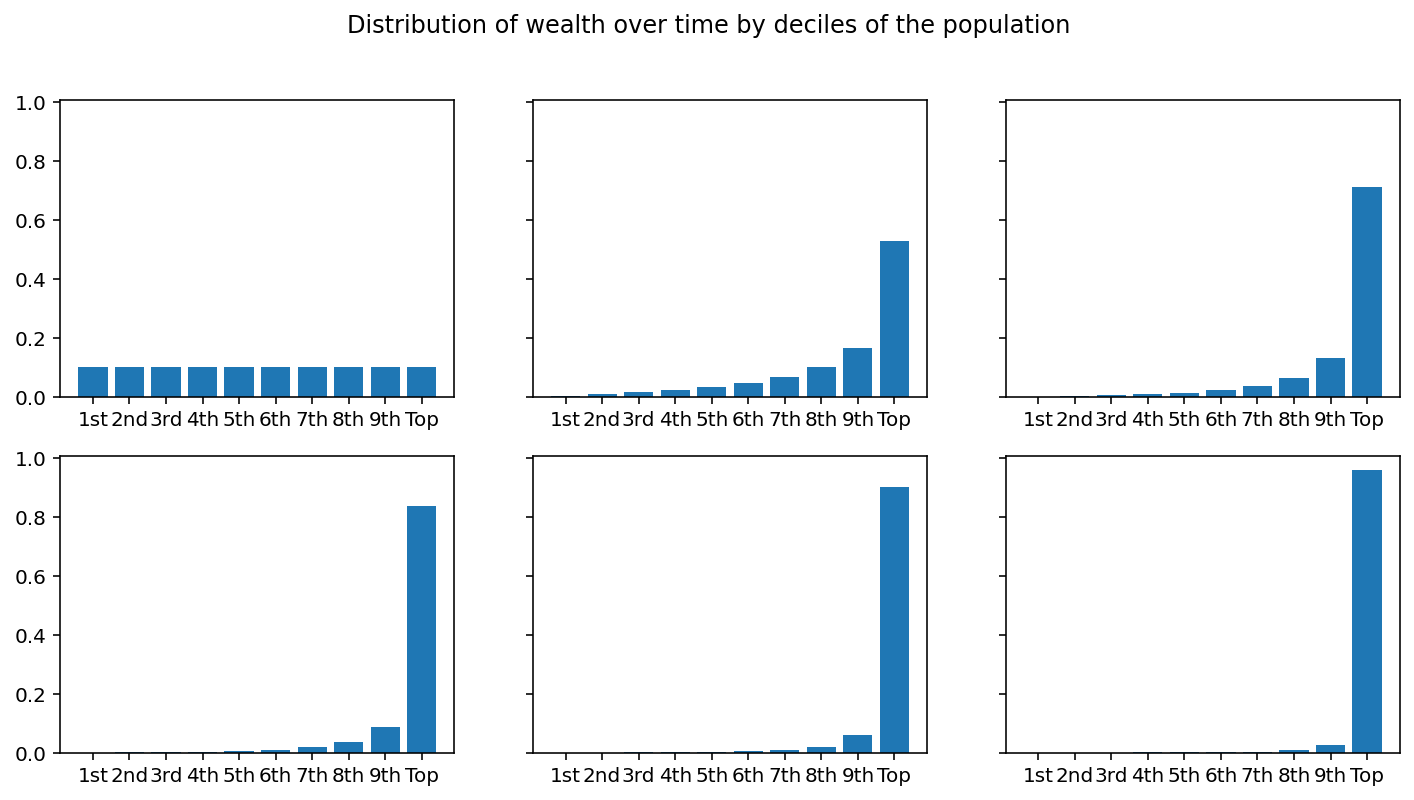

In [1]:
# Entrepreneurs, Chance, and the Deterministic Concentration of Wealth
# Joseph E. Fargione, Clarence Lehman, Stephen Polasky
# https://doi.org/10.1371/journal.pone.0020728

import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt

n, t = 10000, 200
dn, dt = n // 10, t // 10

mu, sigma = 0.05, 0.3
R = np.random.normal(mu, sigma, (10*dn, t))
S = np.ones((10*dn, 1))

X = R.cumsum(axis=1)
Y = np.exp(X)
K = np.concatenate((S, S*Y), axis=1)
K.sort(axis=0)

W_Total = K[0*dn:10*dn].sum(axis=0)
Q_1st = K[0*dn:1*dn].sum(axis=0) / W_Total
Q_2nd = K[1*dn:2*dn].sum(axis=0) / W_Total
Q_3rd = K[2*dn:3*dn].sum(axis=0) / W_Total
Q_4th = K[3*dn:4*dn].sum(axis=0) / W_Total
Q_5th = K[4*dn:5*dn].sum(axis=0) / W_Total
Q_6th = K[5*dn:6*dn].sum(axis=0) / W_Total
Q_7th = K[6*dn:7*dn].sum(axis=0) / W_Total
Q_8th = K[7*dn:8*dn].sum(axis=0) / W_Total
Q_9th = K[8*dn:9*dn].sum(axis=0) / W_Total
Q_Top = K[9*dn:10*dn].sum(axis=0) / W_Total

fig, ax = plt.subplots(2, 3, sharey=True, figsize=(12.0, 6.0))
fig.suptitle('Distribution of wealth over time by deciles of the population')
D = ('1st', '2nd', '3rd', '4th', '5th', '6th', '7th', '8th', '9th', 'Top')
Q = np.stack((Q_1st, Q_2nd, Q_3rd, Q_4th, Q_5th, Q_6th, Q_7th, Q_8th, Q_9th, Q_Top))
ax[0, 0].bar(D, Q[0:10, 0*dt])
ax[0, 1].bar(D, Q[0:10, 1*dt])
ax[0, 2].bar(D, Q[0:10, 2*dt])
ax[1, 0].bar(D, Q[0:10, 3*dt])
ax[1, 1].bar(D, Q[0:10, 4*dt])
ax[1, 2].bar(D, Q[0:10, 5*dt])

plt.show()


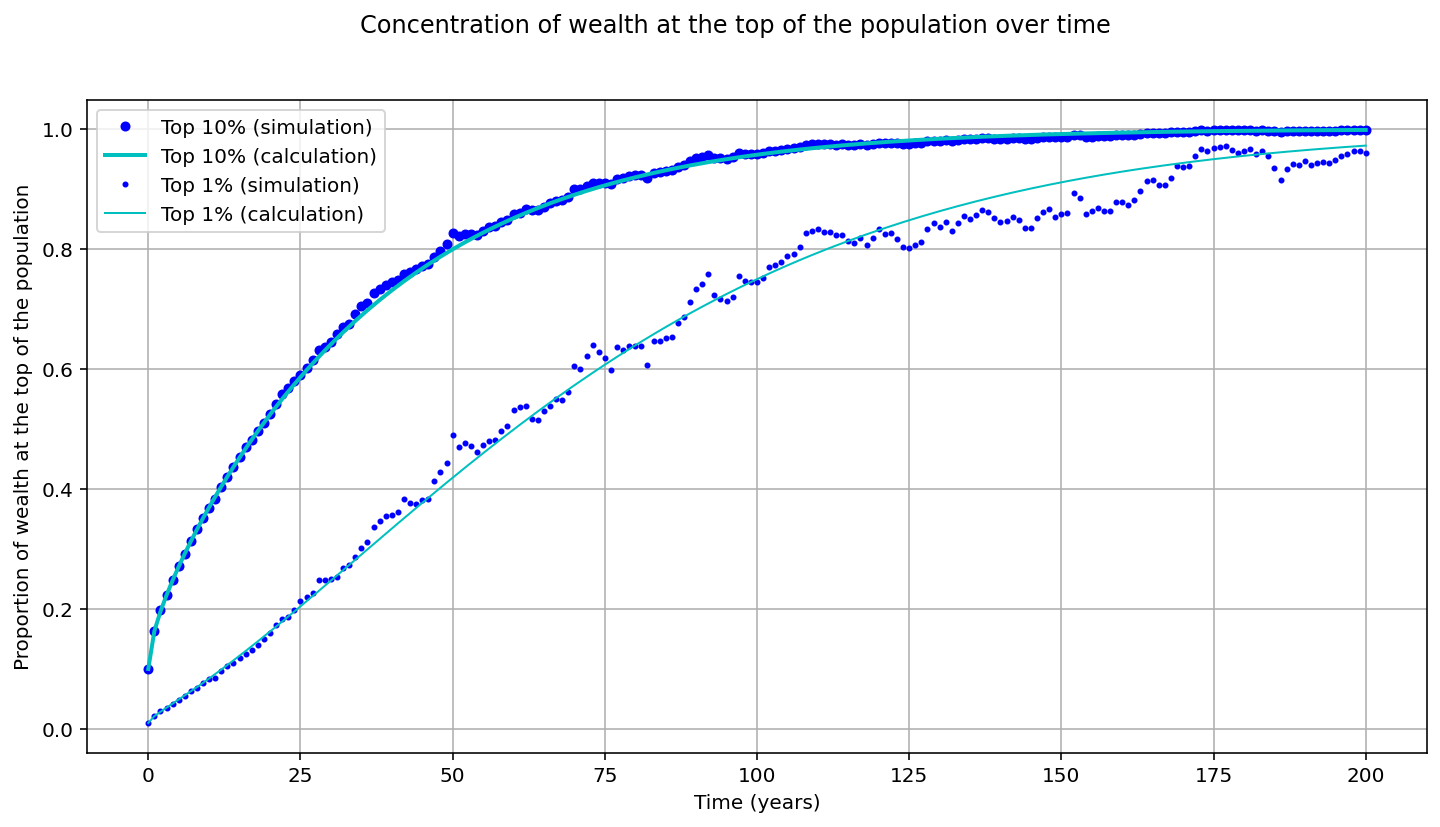

In [2]:
# Entrepreneurs, Chance, and the Deterministic Concentration of Wealth
# Joseph E. Fargione, Clarence Lehman, Stephen Polasky
# https://doi.org/10.1371/journal.pone.0020728

import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt

n, t = 10000, 200
dn, cn = n // 10, n // 100

mu, sigma = 0.05, 0.3
R = np.random.normal(mu, sigma, (n, t))
S = np.ones((n, 1))
T = np.arange(0, t+1, 1)

X = R.cumsum(axis=1)
Y = np.exp(X)
K = np.concatenate((S, S*Y), axis=1)
K.sort(axis=0)

W_Total = K[0:n].sum(axis=0)
Q_Top10 = K[n-dn:n].sum(axis=0) / W_Total
Q_Top100 = K[n-cn:n].sum(axis=0) / W_Total
P_Top10 = sts.norm.cdf(sigma*np.sqrt(T)-sts.norm.ppf(1-0.1))
P_Top100 = sts.norm.cdf(sigma*np.sqrt(T)-sts.norm.ppf(1-0.01))

fig, ax = plt.subplots(figsize=(12.0, 6.0))
fig.suptitle('Concentration of wealth at the top of the population over time')
ax.plot(Q_Top10, 'bo', markersize=4.0, label='Top 10% (simulation)')
ax.plot(T, P_Top10, 'c', linewidth=2.0, label='Top 10% (calculation)')
ax.plot(Q_Top100, 'bo', markersize=2.0, label='Top 1% (simulation)')
ax.plot(T, P_Top100, 'c', linewidth=1.0, label='Top 1% (calculation)')
ax.set(xlabel='Time (years)', ylabel='Proportion of wealth at the top of the population')
ax.legend()
ax.grid()

plt.show()


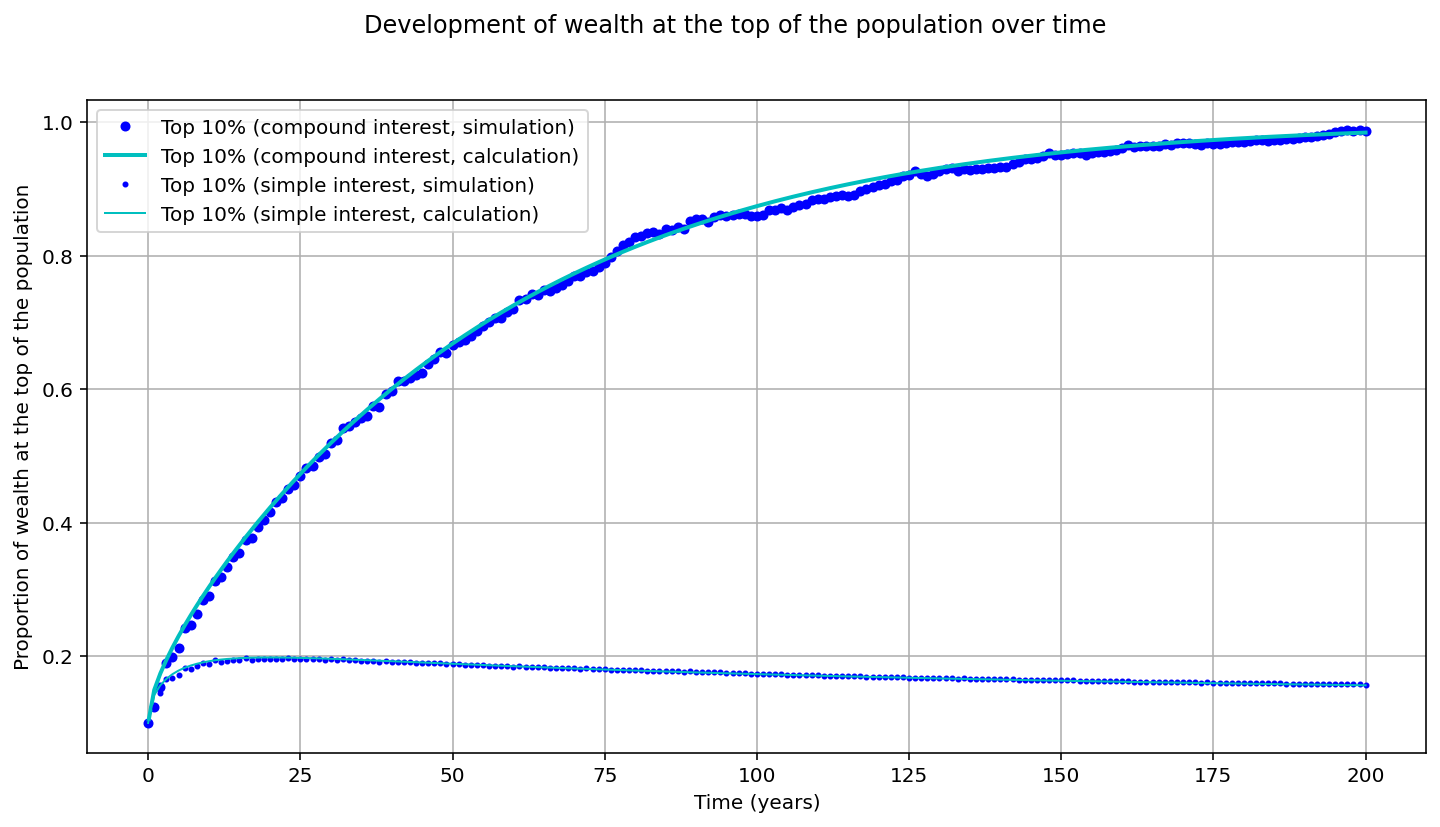

In [3]:
# Entrepreneurs, Chance, and the Deterministic Concentration of Wealth
# Joseph E. Fargione, Clarence Lehman, Stephen Polasky
# https://doi.org/10.1371/journal.pone.0020728

import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt

n, t = 10000, 200
dn = n // 10

rate_of_return = -0.2, 0.3
r = np.array(rate_of_return)
R = np.random.choice(r, (n, t))
S = np.ones((n, 1))
T = np.arange(0, t+1, 1)

mu, sigma = np.mean(r), np.std(r)
X = R.cumsum(axis=1)
Y = 1 + X
K = np.concatenate((S, S*Y), axis=1)
K.sort(axis=0)
W_Total = K[0:n].sum(axis=0)
Q_Top10si = K[n-dn:n].sum(axis=0) / W_Total
P_Top10si = 0.1 + sigma*np.exp(-sts.norm.ppf(1-0.1)**2/2)*np.sqrt(T/np.pi/2)/(mu*T+1)

mu, sigma = np.mean(np.log(1+r)), np.std(np.log(1+r))
X = np.log(1+R).cumsum(axis=1)
Y = np.exp(X)
K = np.concatenate((S, S*Y), axis=1)
K.sort(axis=0)
W_Total = K[0:n].sum(axis=0)
Q_Top10ci = K[n-dn:n].sum(axis=0) / W_Total
P_Top10ci = sts.norm.cdf(sigma*np.sqrt(T)-sts.norm.ppf(1-0.1))

fig, ax = plt.subplots(figsize=(12.0, 6.0))
fig.suptitle('Development of wealth at the top of the population over time')
ax.plot(Q_Top10ci, 'bo', markersize=4.0, label='Top 10% (compound interest, simulation)')
ax.plot(T, P_Top10ci, 'c', linewidth=2.0, label='Top 10% (compound interest, calculation)')
ax.plot(Q_Top10si, 'bo', markersize=2.0, label='Top 10% (simple interest, simulation)')
ax.plot(T, P_Top10si, 'c', linewidth=1.0, label='Top 10% (simple interest, calculation)')
ax.set(xlabel='Time (years)', ylabel='Proportion of wealth at the top of the population')
ax.legend()
ax.grid()

plt.show()
